# Definition of the problem to be solved


In this study we use King Country DB to predict housing prices in Washington-US

# Step 1: Libary import

In [101]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense

# Step 2: Database import

In [102]:
house = pd.read_csv('/content/kc-house-data.csv')

In [103]:
house.reset_index(drop = True, inplace = True)

In [104]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [105]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Step 3: Data cleaning

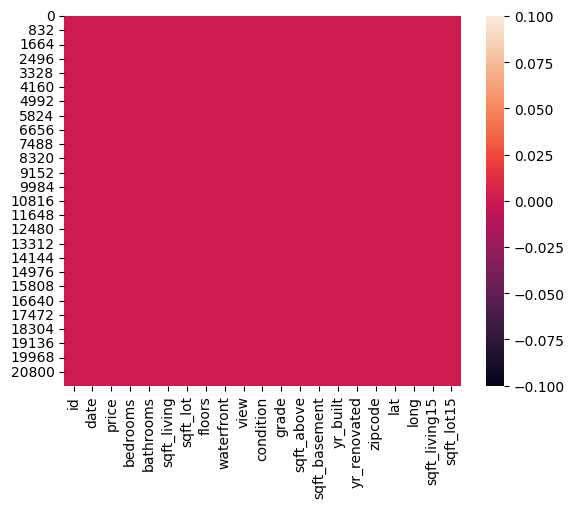

In [106]:
sns.heatmap(house.isnull());

In [107]:
house = house.drop(labels = ['id', 'zipcode', 'sqft_living', 'sqft_lot', 'lat', 'long'], axis = 1)

In [108]:
house.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [109]:
house.date = pd.to_datetime(house.date, format = '%Y/%m/%d')


In [110]:
house.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [111]:
# the yr_renovated line can degrade our model, due to the fact that
# it is mostly 0, so I considered a renovated house as the year of
# its construction
for index, row in house.iterrows():
    if row['yr_renovated'] != 0:
        house.at[index, 'yr_built'] = row['yr_renovated']

In [112]:
house.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1991,1991,1690,7639
2,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [113]:
house.index = pd.DatetimeIndex(house.date)

In [114]:
house = house.drop(labels = ['date', 'yr_renovated'], axis = 1)


In [115]:
house.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,
2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,1340,5650
2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1991,1690,7639
2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,2720,8062
2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,1360,5000
2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,1800,7503


# **Step 4**: Data visualization


In [31]:
sns.pairplot(house)

Output hidden; open in https://colab.research.google.com to view.

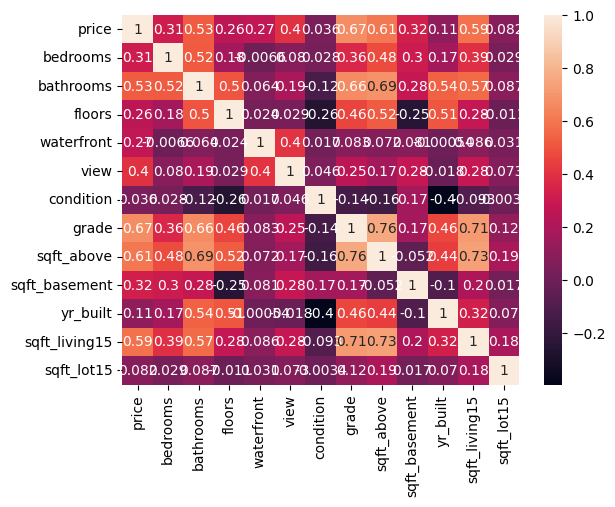

In [116]:
sns.heatmap(house.corr(), annot = True);

# **Step 5:** Database processing

In [117]:
house = house.reset_index()
house.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,1340,5650
1,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1991,1690,7639
2,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,2720,8062
3,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,1360,5000
4,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,1800,7503


In [118]:
house = house.drop(labels=['date'], axis=1)

In [119]:
house.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1991,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,1800,7503


In [159]:
y = house['price'].values
y = y.reshape(-1,1)

select_columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','yr_built', 'sqft_living15', 'sqft_lot15']
x = house[select_columns].values


In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [162]:
x.shape

(21613, 12)

In [163]:
y.shape

(21613, 1)

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


# **Step 6:** Model building and training

In [166]:
model = Sequential()
model.add(Dense(units = 100, activation = 'relu', input_shape = (12,)))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

In [167]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 100)               1300      
                                                                 
 dense_44 (Dense)            (None, 100)               10100     
                                                                 
 dense_45 (Dense)            (None, 100)               10100     
                                                                 
 dense_46 (Dense)            (None, 100)               10100     
                                                                 
 dense_47 (Dense)            (None, 100)               10100     
                                                                 
 dense_48 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41801 (163.29 KB)
Trainable params: 4180

In [168]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [169]:
epochs_hist = model.fit(x_train, y_train, epochs = 40, batch_size = 50, validation_split = 0.2)

Epoch 1/40
277/277 [==============================] - 2s 4ms/step - loss: 0.0010 - val_loss: 8.0533e-04
Epoch 2/40
277/277 [==============================] - 1s 4ms/step - loss: 8.0180e-04 - val_loss: 8.2954e-04
Epoch 3/40
277/277 [==============================] - 1s 4ms/step - loss: 7.6611e-04 - val_loss: 8.0592e-04
Epoch 4/40
277/277 [==============================] - 1s 4ms/step - loss: 7.5275e-04 - val_loss: 7.3799e-04
Epoch 5/40
277/277 [==============================] - 1s 5ms/step - loss: 7.2638e-04 - val_loss: 7.1726e-04
Epoch 6/40
277/277 [==============================] - 1s 3ms/step - loss: 7.0188e-04 - val_loss: 8.9143e-04
Epoch 7/40
277/277 [==============================] - 1s 3ms/step - loss: 7.3762e-04 - val_loss: 7.1620e-04
Epoch 8/40
277/277 [==============================] - 1s 3ms/step - loss: 6.7914e-04 - val_loss: 6.7582e-04
Epoch 9/40
277/277 [==============================] - 1s 3ms/step - loss: 6.7889e-04 - val_loss: 7.3011e-04
Epoch 10/40
277/277 [===========

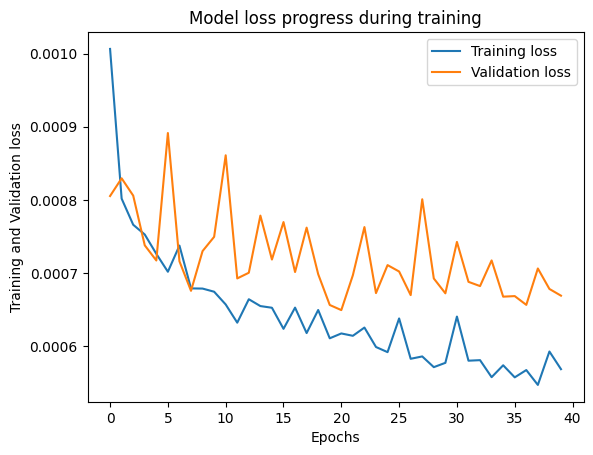

In [170]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [171]:
y_predict = model.predict(x_test)

136/136 [==============================] - 0s 1ms/step


In [172]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [173]:
k = x_test.shape[1]
k

12

In [174]:
n = len(x_test)
n

4323

In [175]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [176]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2)*(n-1)/(n - k - 1)

In [177]:
print('MAE: ', mae, '\nMSE: ', mse, "\nRMSE: ", rmse, '\nR2: ', r2, '\nADJ R2: ', adj_r2)

MAE:  117590.99449709403 
MSE:  32122012982.06495 
RMSE:  179226.15038566483 
R2:  0.7223435548933814 
ADJ R2:  0.7215704975056136


# Testing a new model only with variables with a correlation equal to or greater than 0.5

In [178]:
yn = house['price'].values
yn = y.reshape(-1,1)

select_columns = ['bathrooms', 'grade', 'sqft_above', 'sqft_living15']
xn = house[select_columns].values

In [179]:
scaler = MinMaxScaler()

xn = scaler.fit_transform(xn)
yn = scaler.fit_transform(yn)

In [180]:
xn.shape

(21613, 4)

In [181]:
yn.shape

(21613, 1)

In [182]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.2)


In [183]:
modeln = Sequential()
modeln.add(Dense(units = 100, activation = 'relu', input_shape = (4,)))
modeln.add(Dense(units = 100, activation = 'relu'))
modeln.add(Dense(units = 100, activation = 'relu'))
modeln.add(Dense(units = 100, activation = 'relu'))
modeln.add(Dense(units = 100, activation = 'relu'))
modeln.add(Dense(units = 1, activation = 'linear'))

In [184]:
modeln.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [185]:
nepochs_hist = modeln.fit(xn_train, yn_train, epochs = 40, batch_size = 50, validation_split = 0.2)

Epoch 1/40
277/277 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 8/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/40
277/277 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/40
277/277 [==============================] - 1s 3ms/step - loss: 9.8585e-04 - val_loss: 0.

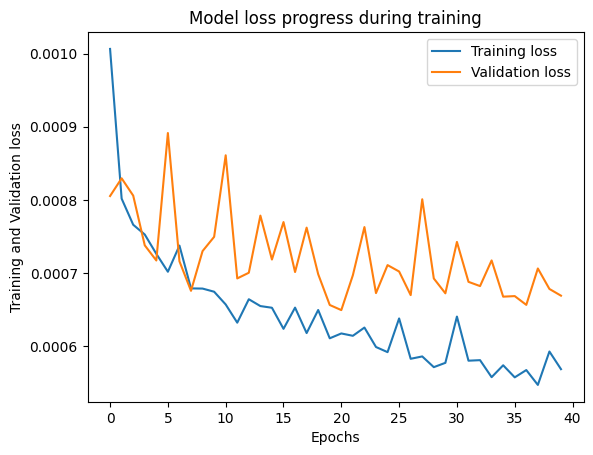

In [186]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [187]:
yn_predict = modeln.predict(xn_test)

136/136 [==============================] - 0s 2ms/step


In [188]:
yn_predict_orig = scaler.inverse_transform(yn_predict)
yn_test_orig = scaler.inverse_transform(yn_test)

In [189]:
kn = xn_test.shape[1]
kn

4

In [190]:
nn = len(x_test)
nn

4323

In [191]:
nmae = mean_absolute_error(yn_test_orig, yn_predict_orig)
nmse = mean_squared_error(yn_test_orig, yn_predict_orig)
nrmse = sqrt(nmse)
nr2 = r2_score(yn_test_orig, yn_predict_orig)
nadj_r2 = 1 - (1-nr2)*(nn-1)/(nn - kn - 1)

In [192]:
print('MAE: ', nmae, '\nMSE: ', nmse, "\nRMSE: ", nrmse, '\nR2: ', nr2, '\nADJ R2: ', nadj_r2)

MAE:  0.02107256184731962 
MSE:  0.001010835680951477 
RMSE:  0.03179364214668519 
R2:  0.5480889043881174 
ADJ R2:  0.5476702743782871
